In [1]:
import pandas as pd
import numpy as np

## Exploring the Data

In [2]:
usa_cars_data = pd.read_csv('C:/Users/sovon/Desktop/Python/ML Datasets/usa-cers-dataset/USA_cars_datasets.csv')
usa_cars_data.head(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [3]:
usa_cars_data = usa_cars_data.drop_duplicates()

In [4]:
usa_cars_data.shape

(2499, 13)

In [5]:
usa_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 0 to 2498
Data columns (total 13 columns):
Unnamed: 0      2499 non-null int64
price           2499 non-null int64
brand           2499 non-null object
model           2499 non-null object
year            2499 non-null int64
title_status    2499 non-null object
mileage         2499 non-null float64
color           2499 non-null object
vin             2499 non-null object
lot             2499 non-null int64
state           2499 non-null object
country         2499 non-null object
condition       2499 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 273.3+ KB


In [6]:
usa_cars_data.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [7]:
usa_cars_data = usa_cars_data.drop(['Unnamed: 0', 'vin', 'lot'], axis=1)

In [8]:
usa_cars_data.head()

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


In [9]:
usa_cars_data.nunique()

price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
state             44
country            2
condition         47
dtype: int64

## Checking Distribution: Target variable

In [10]:
usa_cars_data.hist('price', figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AB1872E08>]],
      dtype=object)

## Checking Distribution: Caterogical variable

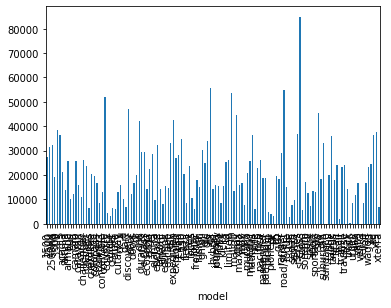

In [11]:
usa_cars_data.groupby('model').mean()['price'].plot(kind = 'bar')

## Checking Distribution: Continuous variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AB22EF808>]],
      dtype=object)

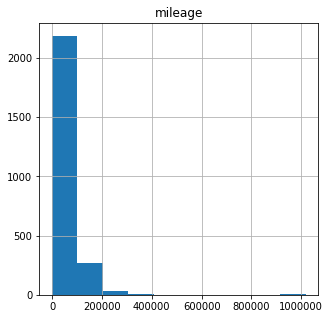

In [12]:
%matplotlib inline
usa_cars_data.hist('mileage', figsize=(5,5))

## Checking the relationship: Continuous vs Categorical using Bar Charts

In [13]:
usa_cars_data.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'state', 'country', 'condition'],
      dtype='object')

In [14]:
usa_cars_data.nunique()

price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
state             44
country            2
condition         47
dtype: int64

In [15]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(18,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).mean()['price'].plot(kind='bar',ax=subPlot[plotNumber])

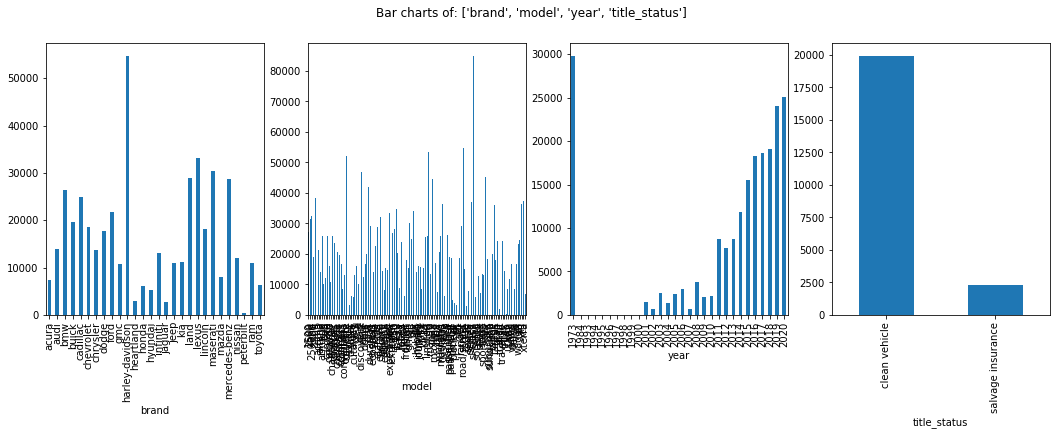

In [16]:
PlotBarCharts(usa_cars_data, colsToPlot=[ 'brand', 'model', 'year', 'title_status'])

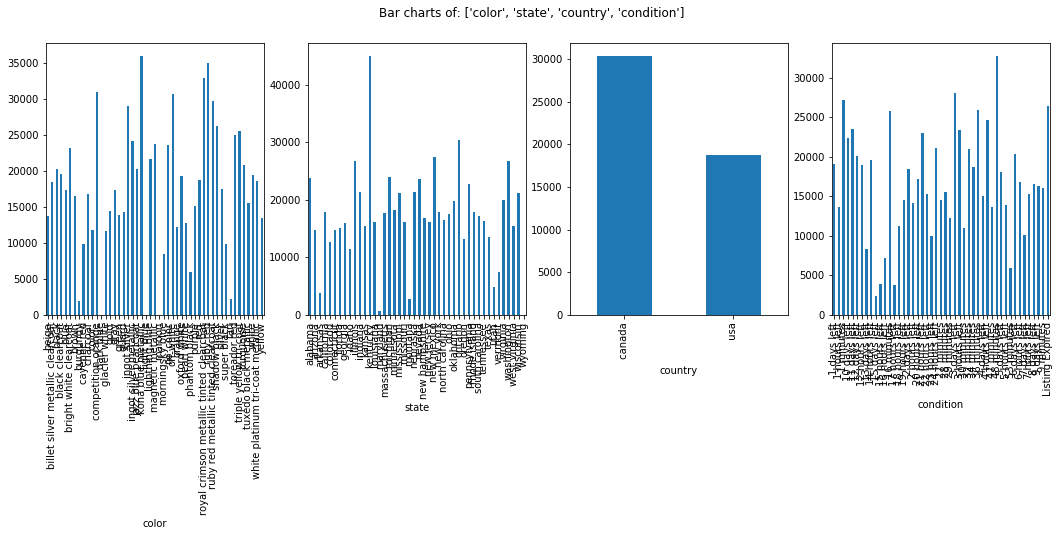

In [17]:
PlotBarCharts(usa_cars_data, colsToPlot=['color', 'state', 'country', 'condition'])

## Checking the relationship: Continuous vs Categorical using P-value

In [18]:
SelectedCols = ['color', 'state', 'country', 'condition','brand', 'model', 'year', 'title_status']
for i in SelectedCols:
    from scipy.stats import f_oneway
    CategoryGrpLists = usa_cars_data.groupby(i)['price'].apply(list)
    AnovaResult = f_oneway(*CategoryGrpLists)
    print('P-value for '+str(i), 'is', AnovaResult[1])
    if(AnovaResult[1]>0.05):
        print('Not Correlated')
    else:
        print('Correlated')

P-value for color is 0.0021294672063593796
Correlated
P-value for state is 5.847308582897665e-52
Correlated
P-value for country is 0.011239081724478047
Correlated
P-value for condition is 3.745980049725946e-69
Correlated
P-value for brand is 1.5926420072174552e-51
Correlated
P-value for model is 0.0
Correlated
P-value for year is 7.787323021395513e-115
Correlated
P-value for title_status is 1.2931766331710356e-76
Correlated


## Checking the relationship: Continuous vs Continuous using Scatter Plot

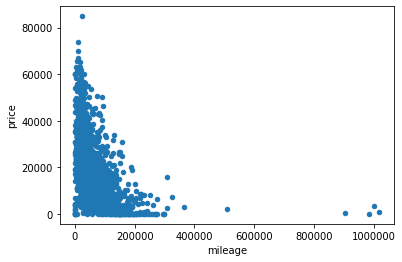

In [19]:
usa_cars_data.plot.scatter('mileage', 'price')

## Checking the relationship: Continuous vs Continuous using Correlation Matrix

In [20]:
usa_cars_data.corr()

,price,year,mileage
price,1.000000,0.418274,-0.400838
year,0.418274,1.000000,-0.594686
mileage,-0.400838,-0.594686,1.000000


## Outlier treatement section

In [21]:
usa_cars_data['price'][usa_cars_data['price']>80000]=75000

C:\Users\sovon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


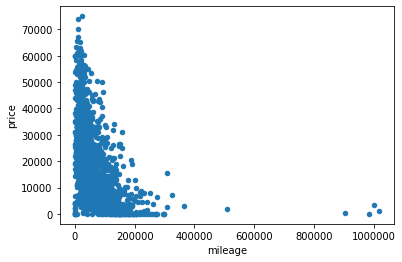

In [22]:
usa_cars_data.plot.scatter('mileage', 'price')

## Data Preprocessing

In [23]:
usa_cars_data.head()

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


In [24]:
usa_cars_data.nunique()

price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
state             44
country            2
condition         47
dtype: int64

In [25]:
usa_cars_data = usa_cars_data.drop('mileage', axis=1)

In [26]:
usa_cars_data.nunique()

price           790
brand            28
model           127
year             30
title_status      2
color            49
state            44
country           2
condition        47
dtype: int64

### Converting the Data into Numeric :(

In [27]:
usa_cars_data = pd.get_dummies(usa_cars_data)

In [28]:
usa_cars_data.head()

,price,year,brand_acura,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,...,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
0,6300,2008,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,2011,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5350,2018,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,25000,2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,2018,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Principle Component Analysis

In [29]:
Target = usa_cars_data['price']
year = usa_cars_data['year']
OnlyPredictors = usa_cars_data.drop(['price', 'year'], axis=1)

In [30]:
print(Target.shape)
print(year.shape)
print(OnlyPredictors.shape)

(2499,)
(2499,)
(2499, 299)


In [33]:
X = OnlyPredictors.values
y = Target.values

In [34]:
print(X.shape)
print(y.shape)

(2499, 299)
(2499,)


In [31]:
OnlyPredictors.head()

,brand_acura,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,brand_ford,brand_gmc,...,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X.shape[1])
pca_fit = pca.fit(X)
reduced_X = pca_fit.transform(X)

In [42]:
var_explained = pca.explained_variance_ratio_
np.round(var_explained,2)

array([0.08, 0.07, 0.06, 0.06, 0.04, 0.04, 0.04, 0.03, 0.03, 0.03, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [44]:
Cumulative = np.cumsum(var_explained)
np.round(Cumulative, 2)

array([0.08, 0.15, 0.21, 0.26, 0.3 , 0.34, 0.38, 0.41, 0.44, 0.47, 0.49,
       0.52, 0.54, 0.56, 0.58, 0.59, 0.61, 0.62, 0.64, 0.65, 0.66, 0.67,
       0.68, 0.69, 0.7 , 0.71, 0.71, 0.72, 0.73, 0.74, 0.74, 0.75, 0.75,
       0.76, 0.77, 0.77, 0.78, 0.78, 0.79, 0.79, 0.8 , 0.8 , 0.81, 0.81,
       0.81, 0.82, 0.82, 0.83, 0.83, 0.83, 0.84, 0.84, 0.85, 0.85, 0.85,
       0.86, 0.86, 0.86, 0.87, 0.87, 0.87, 0.87, 0.88, 0.88, 0.88, 0.88,
       0.89, 0.89, 0.89, 0.89, 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.91, 0.91,
       0.91, 0.91, 0.91, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.93, 0.93,
       0.93, 0.93, 0.93, 0.93, 0.93, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96,
       0.96, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97,
       0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.

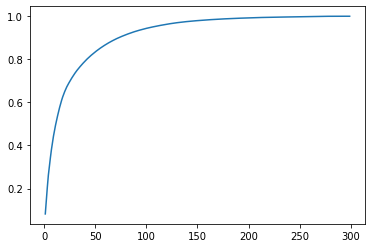

In [45]:
import matplotlib.pyplot as plt
plt.plot(range(1,300), Cumulative)
plt.show()